### PROBLEM 2: Conditional Sampling
Implement Gibbs Sampling for a multidim gaussian generative joint, by using the conditionals which are also gaussian distributions . The minimum requirement is for joint to have D=2 variables and for Gibbs to alternate between the two.

In [62]:
# Importing the required libraries

import random

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
seed = 42

random.seed(seed)
np.random.seed(seed)

In [64]:
mean = np.array([0, 0])
mean

array([0, 0])

In [65]:
cov = np.array([[2, 1], [1, 2]])
cov

array([[2, 1],
       [1, 2]])

In [66]:
n_samples = int(1e4)

test_samples = np.random.multivariate_normal(mean, cov, size=n_samples)
test_samples.shape

(10000, 2)

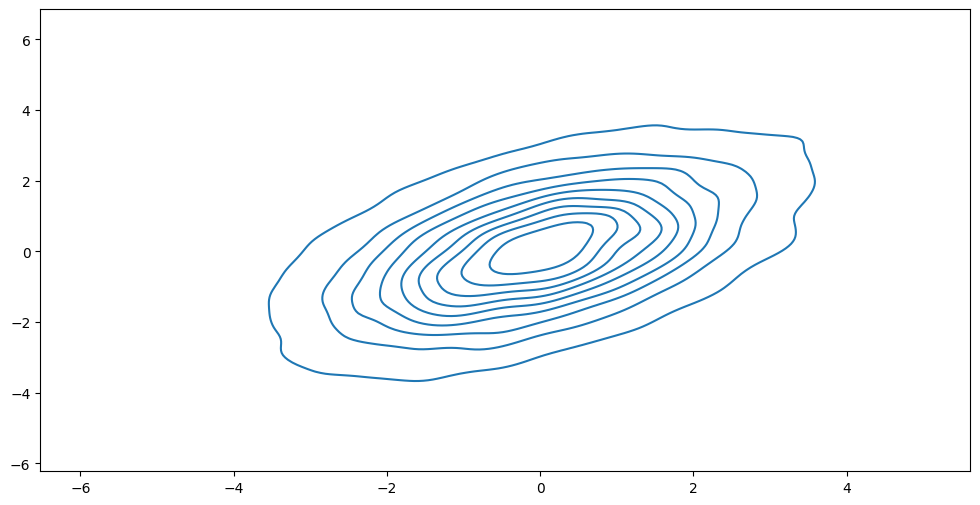

In [67]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x=test_samples[:, 0], y=test_samples[:, 1])
plt.show()

In [68]:
def conditional_sampler(sampling_idx, curr_pt, mu, cov):
    conditioned_idx = 1 - sampling_idx

    a = cov[sampling_idx, sampling_idx]
    b = cov[sampling_idx, conditioned_idx]
    c = cov[conditioned_idx, conditioned_idx]

    mean = mu[sampling_idx] + (b / c) * (curr_pt[conditioned_idx] - mu[conditioned_idx])
    sigma = a - (np.square(b) / c)

    new_pt = np.copy(curr_pt)
    new_pt[sampling_idx] = np.random.normal(mean, sigma)

    return new_pt

In [69]:
def gibbs_sampling(mu: np.array, cov: np.array, num_samples: int):
    support_lb = mu - 3 * np.diagonal(np.sqrt(cov))
    support_ub = mu + 3 * np.diagonal(np.sqrt(cov))
    point = np.random.uniform(low=support_lb, high=support_ub)

    samples = np.empty(shape=(num_samples, 2))
    samples[0] = point

    for idx in range(num_samples - 1):
        point = conditional_sampler(0, point, mu, cov)
        point = conditional_sampler(1, point, mu, cov)
        samples[idx + 1] = point

    return samples

In [70]:
n_samples = int(1e4)

gibbs_samples = gibbs_sampling(mean, cov, n_samples)
gibbs_samples.shape

(10000, 2)

In [71]:
gibbs_df = pd.DataFrame()

samples = [samples, test_samples]
gen_methods = ["Numpy Multivariate Norm PDF", "Gibbs Sampling"]

for _samples, _gen_method in zip(samples, gen_methods):
    df = pd.DataFrame()
    df["X1"] = _samples[:, 0]
    df["X2"] = _samples[:, 1]
    df["Gen Method"] = _gen_method

    gibbs_df = pd.concat([gibbs_df, df], axis=0)

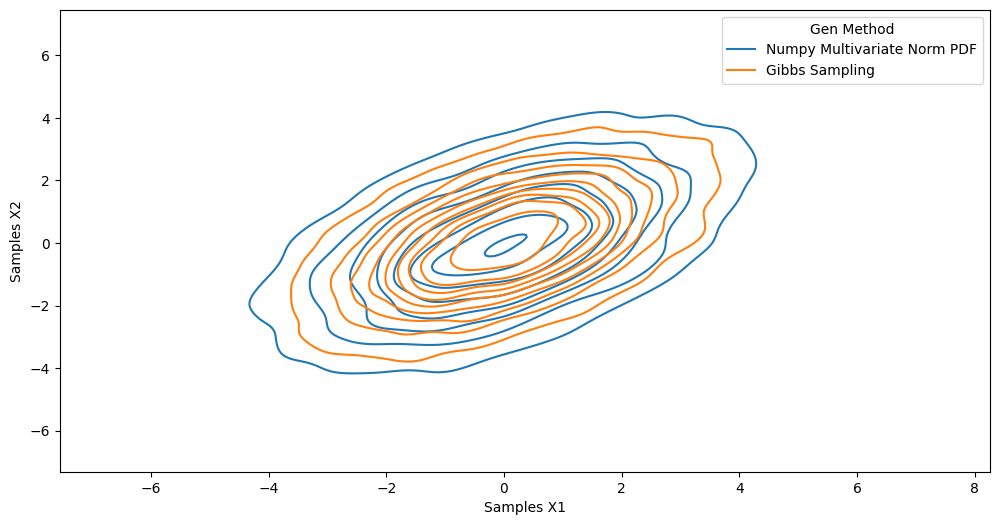

In [72]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=gibbs_df, x="X1", y="X2", hue="Gen Method")
plt.show()